# Data API: OGC Features example

OGC Features is the replacement for Web Feature Service.

More info about the API can be found here - https://ogcapi.ogc.org/features/overview.html

### Using AIMS Temperature Loggers data as an example - this notebook demonstrates

- List available datasets (coverages)
- Get "queryables" for a collection
- Fetch subset of data - filtered by
  - Bounding box
  - Temporal extent
  - Property values (`deployment_id` and `qc_flag`)

### Notes on `owslib`

`owslib` is a python library for working with OGC web services and the new OGC APIs - it has up-to-date support of the OGC Features standard.

In [ ]:
# First, install and load the required packages.

import subprocess

packages = [
    'getpass',
    'owslib'
]

for package in packages:
    try:
        subprocess.check_call(['pip', 'install', package])
        print(f'Successfully installed {package}')
    except subprocess.CalledProcessError as e:
        print(f'Error occurred while installing {package}: {e}')

In [1]:
from IPython.display import JSON
from owslib.ogcapi.features import Features
from getpass import getpass

# Connecting to Data API - OGC Features

We first connect to the Data API by setting up a OGC Features API endpoint.

To do this, you will need to go to https://dashboard.staging.reefdata.io/ and copy your Authentication token.
This can then be pasted into the password prompt.

In [2]:
w = Features('https://pygeoapi.staging.reefdata.io/', headers={'Authorization': f'Bearer {getpass()}'})

## List available collections

In [3]:
w.feature_collections()

['aims-sst',
 'aims-sst-private',
 'abs-regional-lga-2021',
 'gbrmpa-reef-biogeography',
 'gbrmpa-complete-gbr-features',
 'gbrmpa-management-areas',
 'dcceew-coral-sea-boundary',
 'gbrmpa-marine-park-zoning',
 'gbrmpa-gbr-river-basins',
 'abs-lgas-2021',
 'abs-lgas-2022',
 'abs-postal-areas-2021',
 'gbrmpa-cruise-ship-transit-lines',
 'gbrmpa-remote-natural-areas',
 'gbrmpa-special-management-areas',
 'gbrmpa-traditional-use-areas',
 'gbrmpa-whale-protection-area',
 'qtmr-recreational-boat-facilities',
 'gbrmpa-marine-park-limits',
 'qtmr-vessel-registrations']

## Get collection metadata

The following is equivalent to 

- https://pygeoapi.staging.reefdata.io/collections/aims-sst

In [4]:
coll_id = 'aims-sst'
aims_sst = w.collection(coll_id)
JSON(aims_sst)

<IPython.core.display.JSON object>

## Get Queryables

Queryables are the properties that can be used to filter the data (eg columns in a table).

The following is equivalent to

- https://pygeoapi.staging.reefdata.io/collections/aims-sst/queryables

In [5]:
collection_queryables = w.collection_queryables(coll_id)

JSON(collection_queryables)

<IPython.core.display.JSON object>

## Get subset of data

By default OGC Features API will return GeoJSON (Feature Collection)

Here we are filtering the data by
- Bounding box = `[149,-20,150,-19]`
- Temporal extent = `2002-07-10` to `2002-07-20`
- Deployment ID = `3499`
- QC Flag = `1`

The following is equivalent to

- https://pygeoapi.staging.reefdata.io/collections/091-aims-sst/items?bbox=149,-20,150,-19&datetime=2002-07-10T00:00:00Z/2002-07-20T00:00:00Z&deployment_id=3499&qc_flag=1&limit=1000

In [11]:
items = w.collection_items(coll_id,
                            bbox=[149,-20,150,-19],
                            datetime='2002-07-10T00:00:00Z/2002-07-20T00:00:00Z',
                            deployment_id=3499,
                            qc_flag=1,
                            limit=1000)

## Print the first GeoJson Feature

In [12]:
JSON(items['features'][0])

<IPython.core.display.JSON object>

## Plot the data!

This is a very basic example that just plots time-series. We ignore geometry as all the data is from the same location.

<Axes: title={'center': 'SST at Hardy Reef'}, xlabel='time', ylabel='Temperature (C)'>

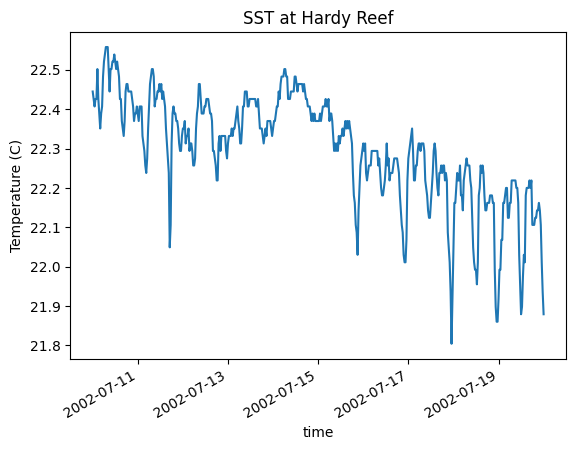

In [4]:
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import pandas as pd

gdf = GeoDataFrame.from_features(items)
gdf.time = pd.to_datetime(gdf.time)  # Convert from string to datetime
site_name = gdf.site[0]
gdf.plot.line(x='time', 
              y='qc_val', 
              legend=False, 
              ylabel='Temperature (C)', 
              title=f'SST at {site_name}')